In [25]:
import pandas as pd
import numpy as np

#household = pd.read_csv("../join/pums_to_household_norm/household_normalized_renamed.csv")
#pums = pd.read_csv("../join/pums_to_household_norm/join_features_normalized.csv")
household = pd.read_csv("../models/household_complete_one_hot.csv")
pums = pd.read_csv("../models/joined_weather.csv")

In [26]:
pums_sample = pums.sample(30000)

In [27]:
columns = set(household.columns) & set(pums.columns)

In [28]:
from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

diffs = []
for column in columns:
    p_col = pums_sample[[column]].fillna(-1).as_matrix().flatten()
    h_col = household[[column]].fillna(-1).as_matrix().flatten()
    both = np.concatenate((p_col, h_col))
    _, bins = np.histogram(both, bins='auto')
    if len(bins) >= np.max(both) - np.min(both) - 1:
        _, bins = np.histogram(both, bins=int(np.max(both) - np.min(both)))
    if len(bins) <= 3:
        _, bins = np.histogram(both, bins=2)
    if len(bins) >= 100:
        _, bins = np.histogram(both, bins=100)
        
    hist_p, _ = np.histogram(p_col, bins=bins)
    hist_p = hist_p.astype(np.float) / norm(hist_p, ord=1)
    hist_h, _ = np.histogram(h_col, bins=bins)
    hist_h = hist_h.astype(np.float) / norm(hist_h, ord=1)
    diff = JSD(hist_p, hist_h)
    diffs.append((diff, column, hist_h.tolist(), hist_p.tolist(), bins))

In [29]:
diffs = sorted(diffs, reverse=True)

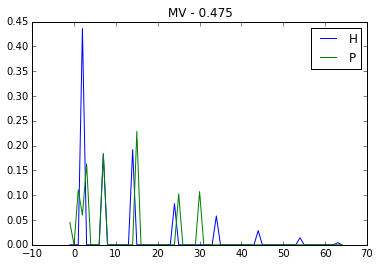

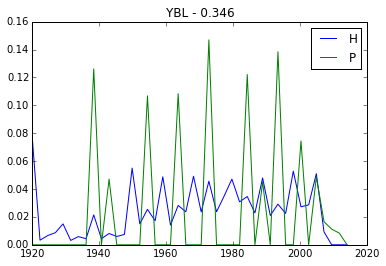

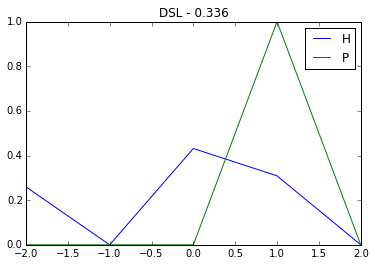

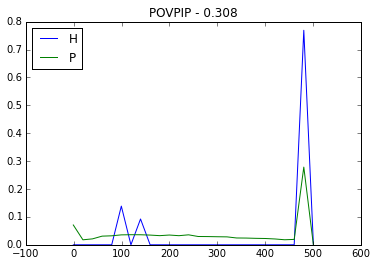

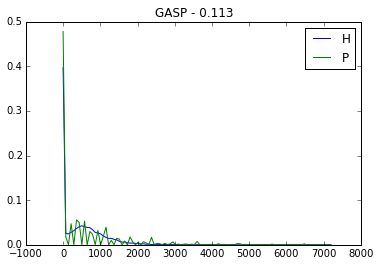

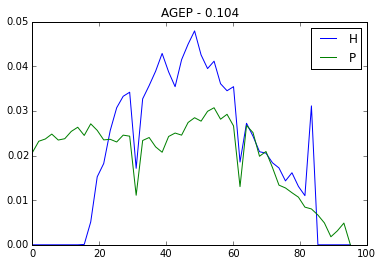

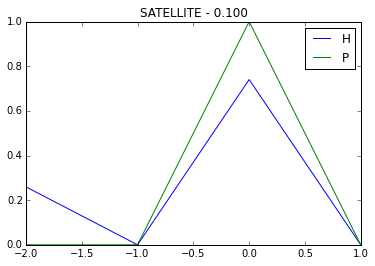

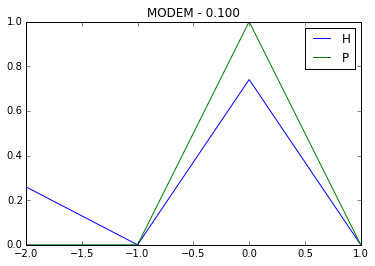

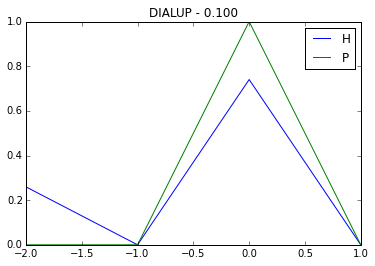

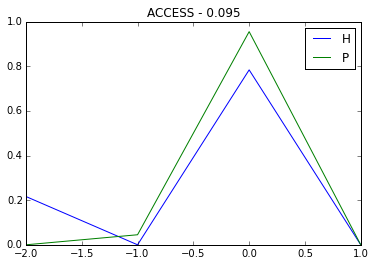

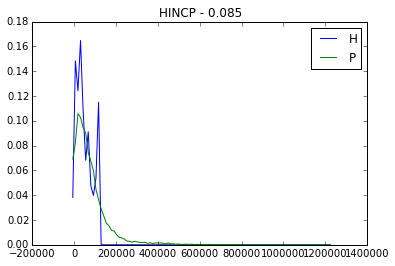

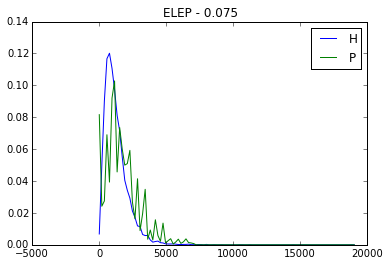

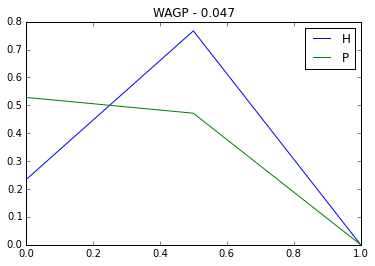

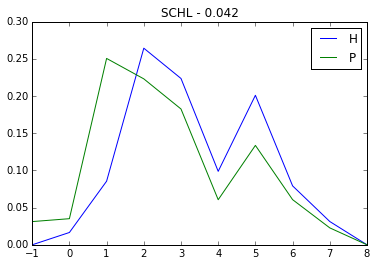

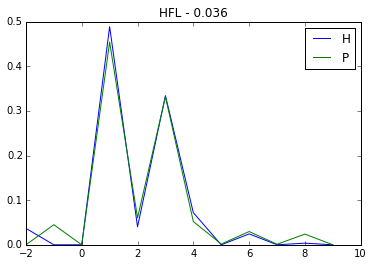

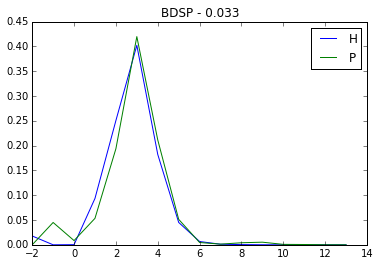

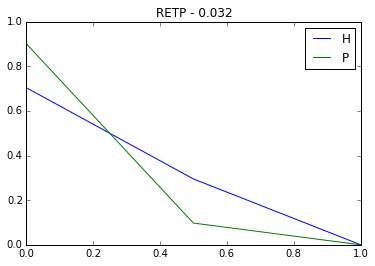

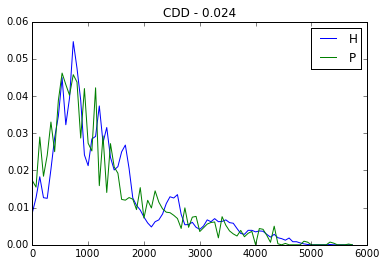

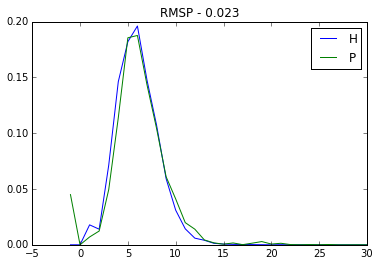

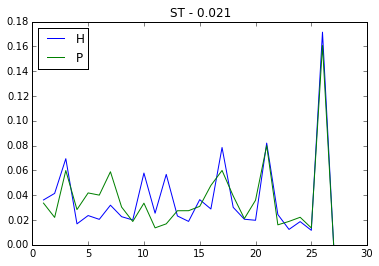

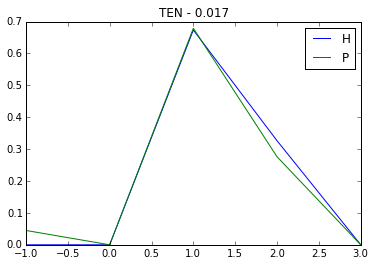

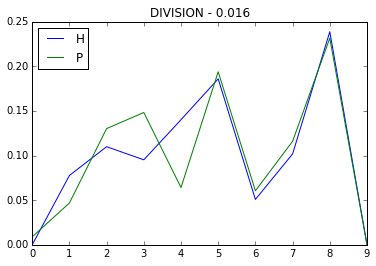

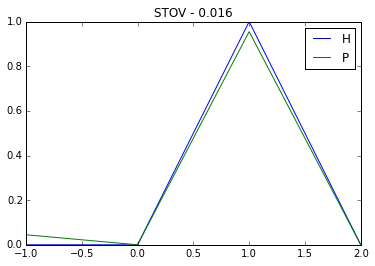

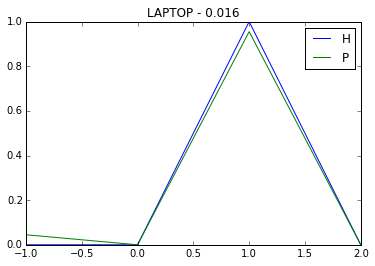

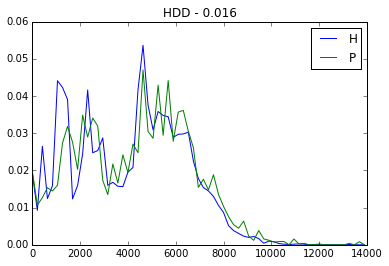

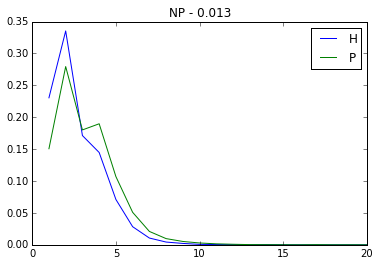

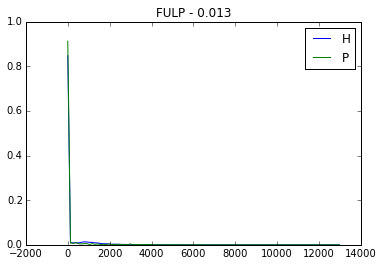

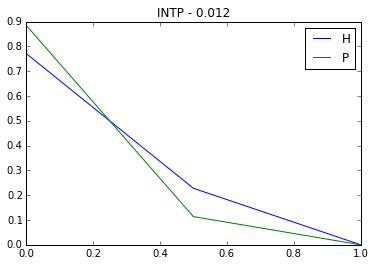

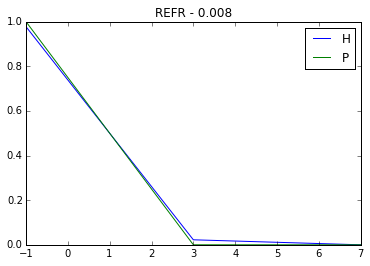

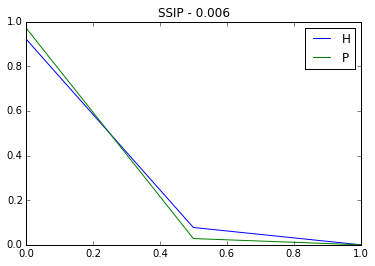

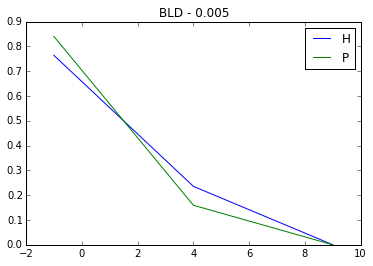

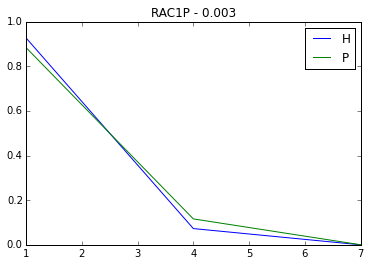

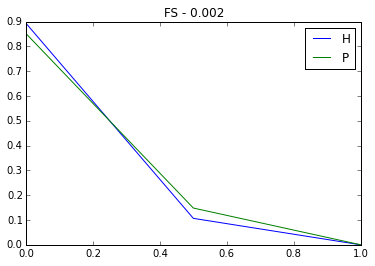

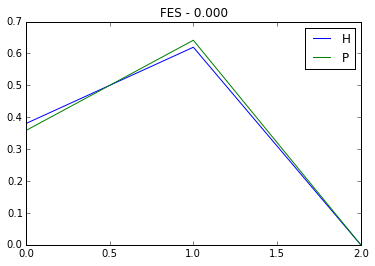

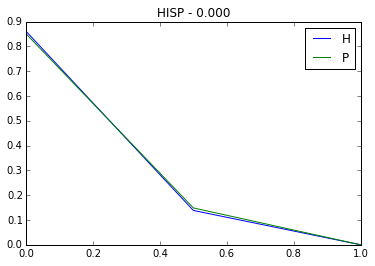

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
for d, c, h, p, b in diffs:
    plt.plot(b, h + [0], b, p + [0])
    plt.title("%s - %0.3f" % (c, d))
    plt.legend(['H', 'P'], loc='best')
    plt.show()